# Exploratory Data Analysis (EDA)

## Project Goal
Detect early academic risk using Machine Learning

## Why EDA?
EDA helps understand data structure, distributions, and quality before modeling.


In [5]:
import pandas as pd
df=pd.read_csv("student_data.csv")

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Target Variable (G3)
G3 represents the final grade of a student and is used as the outcome variable for analysis.
All other features are observed before the final exam.

In [12]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

<Axes: >

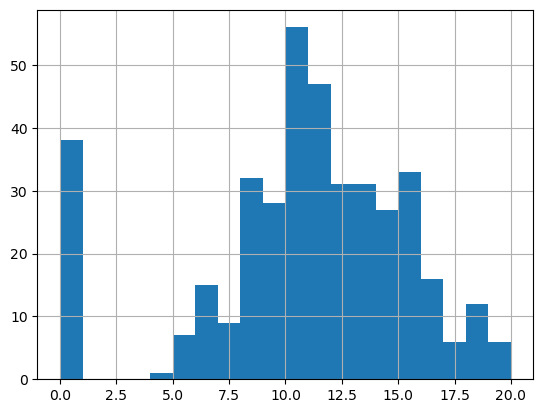

In [13]:
df['G3'].hist(bins=20)

## Observation:
The distribution of final grades (G3) is slightly skewed, with most students scoring in the mid-range. A noticeable portion of students score on the lower end, indicating a non-trivial number of low-performing students.

In [14]:
df['pass']=df['G3'] >= 10
df['pass'].value_counts(normalize=True)

pass
True     0.670886
False    0.329114
Name: proportion, dtype: float64

Around 67% of students are passing while approximately 33% are failing

In [12]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No missing values found → noimputation required

In [15]:
df[['G1','G2','G3']].corr()

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


<Axes: xlabel='G2', ylabel='G3'>

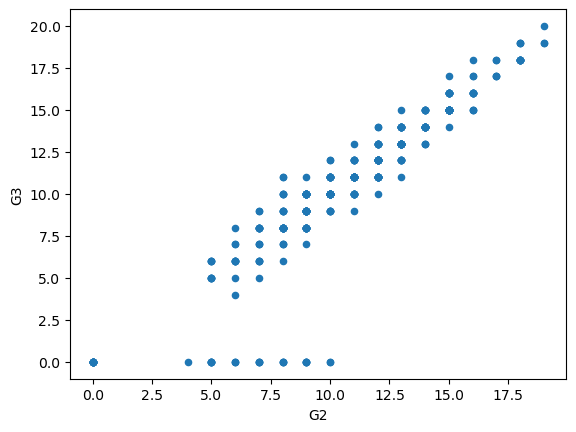

In [16]:
df.plot.scatter(x='G2', y='G3')

Mid-semester grade (G2) shows strong correlation with final grade (G3)

In [17]:
df.groupby('studytime')['G3'].mean()

studytime
1    10.047619
2    10.171717
3    11.400000
4    11.259259
Name: G3, dtype: float64

Students who report higher study time tend to have higher average final grades, indicating a positive relationship between study effort and performance

<Axes: xlabel='absences', ylabel='G3'>

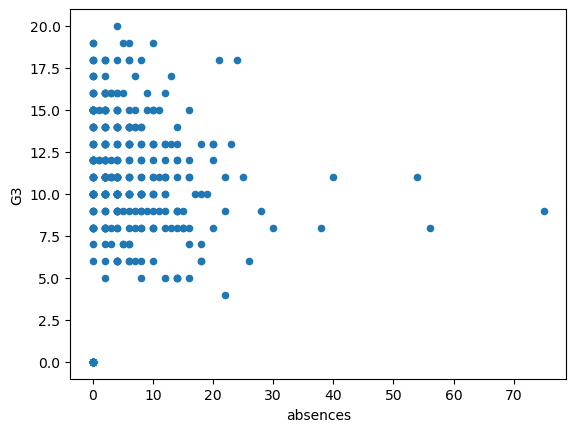

In [18]:
df.plot.scatter(x='absences', y='G3')

More absences → lower grades 

In [19]:
df.groupby('sex')['G3'].mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

<Axes: >

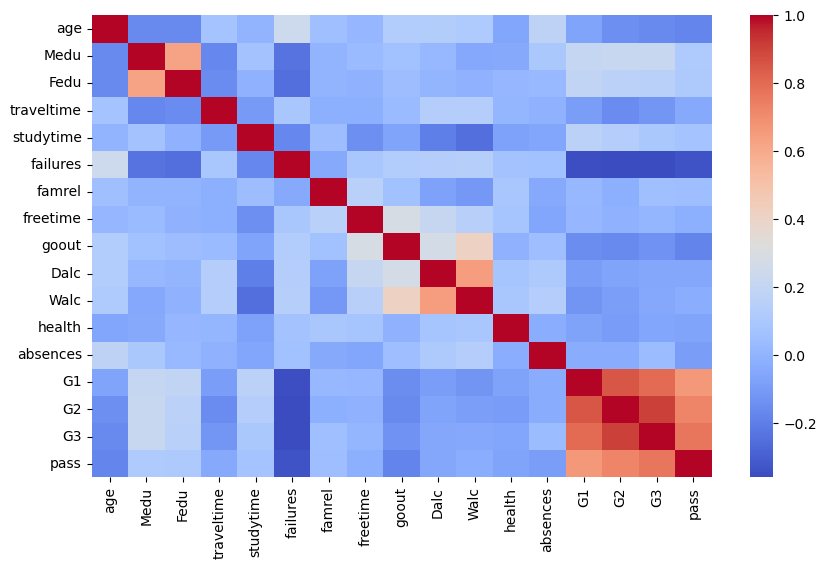

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')


The heatmap shows a very strong positive correlation between G1, G2, and G3, indicating that earlier exam scores are strong predictors of final performance. This also highlights potential data leakage risk, so feature selection must be done carefully.

## Summary
1. G3 selected as prediction target
2. G1 and G2 are strongest predictors
3. Attendance and study time influence performance
4. No missing values in dataset
5. Classification (risk prediction) may be more useful than raw regression